In [1]:
import pyvista as pv
import pathlib

case_folder = pathlib.Path("/home/ubuntu/Documentos/Repositories/insight/Docker/local/openfoam/028-Lyon/000/case.foam")
reader = pv.POpenFOAMReader(case_folder)

reader.case_type = "decomposed"
mesh = reader.read()
internal_mesh = mesh["internalMesh"]

sliced_mesh = internal_mesh.slice(normal=[0, 1, 0], origin=[-300, -12.1, 1873.62])
contour = sliced_mesh.contour(isosurfaces=24, scalars="U")

/home/ubuntu/.cache/pypoetry/virtualenvs/cfdmod-7yEqALRC-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


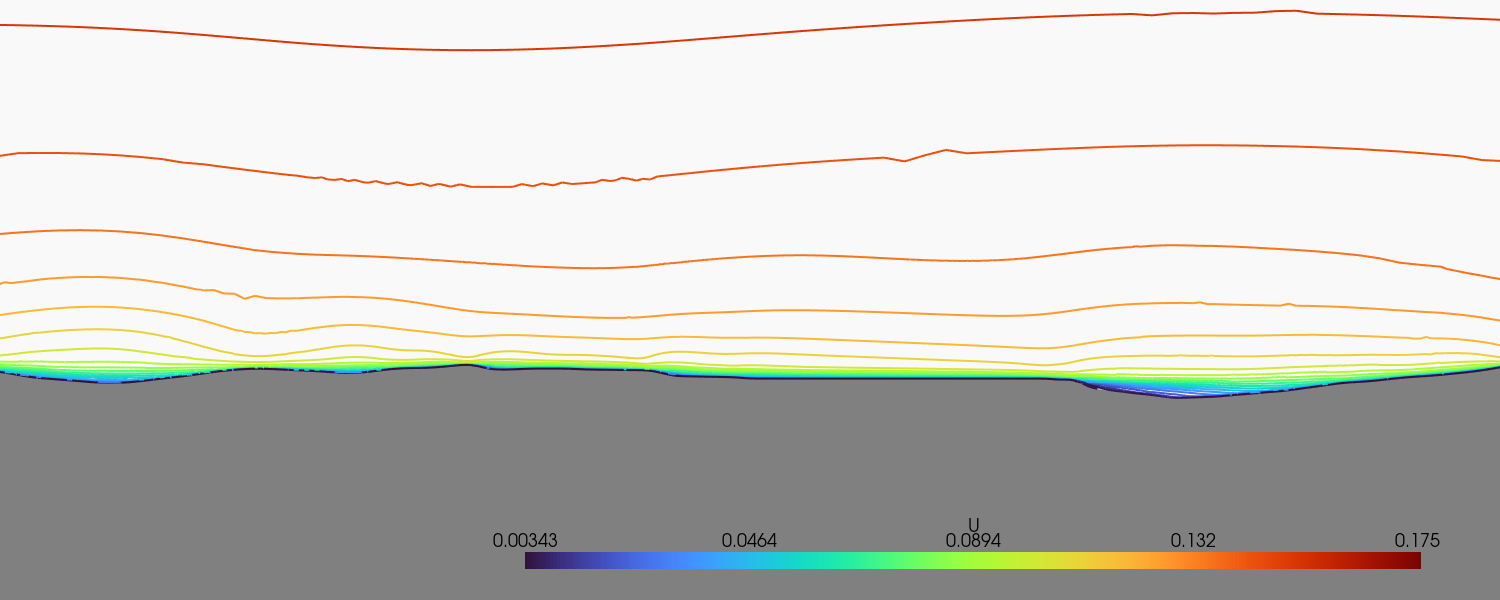

In [5]:
import numpy as np

pv.global_theme.cmap = 'turbo'

camera_pos = sliced_mesh.center + np.array([0,1000,-1000])
camera_foccus = sliced_mesh.center + np.array([0,0,-1000])
# camera_foccus = sliced_mesh.center + np.array([0,0,0])

plotter = pv.Plotter(off_screen=False, lighting="three lights")

camera = plotter.camera
camera.SetFocalPoint(camera_foccus)
camera.SetPosition(camera_pos)
plotter.camera.zoom(0.6)

plotter.set_background(color="gray")
# line width = 2
    
# plotter.add_mesh(sliced_mesh, color="white", show_edges=True)  # Replace "U" with the desired field name
plotter.add_mesh(sliced_mesh, color="white")  # Replace "U" with the desired field name
plotter.add_mesh(contour, scalars="U", line_width=2)  # Replace "U" with the desired field name
# plotter.remove_scalar_bar()
plotter.show(window_size=[1500, 600])